In [1]:
import pandas as pd
import re
import sys
sys.path.append('/home/climaco/Aptamers/src')
import time
import os
from APTamers import  Aptamer_Fold
from tqdm import tqdm
from utils import check_char, check_if_string, check_structure, check_empty_or_short, find_substrings,  attach_stems
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd
import forgi.visual.mplotlib as fvm
import forgi
from tqdm import tqdm
from forgi.graph.bulge_graph import BulgeGraph
import matplotlib.pyplot as plt
import pandas as pd
import forgi.visual.mplotlib as fvm
import forgi
from tqdm import tqdm
from forgi.graph.bulge_graph import BulgeGraph

path = '/home/climaco/Aptamers/data/Noelle_files'
# Replace 'file_path.xlsx' with the path to your Excel file
file_paths = ['N48 after 9th',
              'N48 after 13th',
              'N58 after 12th',
              'N58 after 16th']
tres = 20        
for file in file_paths:
    print(f'{file}')
    # Read the Excel file into a Pandas DataFrame
    df = pd.read_excel(os.path.join(path, file+'.xlsx' ), header= 1)
    # Filter the DataFrame based on the 'Sequence' column using the check_structure function (ORDER of filters is important)
    len1 = len(df)
    df = df[df['Sequence'].apply(lambda x: check_if_string(x))]
    df = df[df['Sequence'].apply(lambda x: check_structure(x))]
    df['Sequence'] = df['Sequence'].apply(lambda x: find_substrings(x))
    df = df[df['Sequence'].apply(lambda x: check_empty_or_short(x, threshold= tres))]
    len2 = len(df)
    df['Sequence'] = df['Sequence'].apply(lambda x: attach_stems(x))
    df = df[df['Sequence'].apply(lambda x: check_char(x))]
    len3 = len(df)
    df = df.reset_index(drop=True)
    # Display the resulting DataFrame
    print( 'Number of provided structures:', len1)
    print( f'Number of sequences removed without ___Nxx___ structure or with less than {tres} randomized nucleotides:', len1 - len2)
    print( 'Number of sequences with invalid character:', len2 - len3)
    print( 'Number of structures after preprocessing:', len3)
    print('\n')
    start = time.time()
    #APT = Aptamer_Fold()
    '''
    df['Structure_graph_match'] = df['Sequence'].apply(lambda x: Aptamer_Fold().fit_fold(sequence= x,  n_tmpl=4, l_fix=8 , filters = False))
    print(time.time()- start) 
    df= df.dropna(subset=['Structure_graph_match'])
    print('Number for which no motif was found', len3- len(df))
    print('\n')
    df.to_csv(f'Preprocessed_{file}.csv', index=False)
    '''
    


N48 after 9th
Number of provided structures: 7819
Number of sequences removed without ___Nxx___ structure or with less than 20 randomized nucleotides: 3116
Number of sequences with invalid character: 271
Number of structures after preprocessing: 4432


N48 after 13th
Number of provided structures: 3776
Number of sequences removed without ___Nxx___ structure or with less than 20 randomized nucleotides: 1928
Number of sequences with invalid character: 184
Number of structures after preprocessing: 1664


N58 after 12th
Number of provided structures: 2665
Number of sequences removed without ___Nxx___ structure or with less than 20 randomized nucleotides: 754
Number of sequences with invalid character: 181
Number of structures after preprocessing: 1730


N58 after 16th
Number of provided structures: 2371
Number of sequences removed without ___Nxx___ structure or with less than 20 randomized nucleotides: 806
Number of sequences with invalid character: 260
Number of structures after preproces

In [21]:
df = pd.read_csv('/home/climaco/Aptamers/data/prepocessed_files/merged_all.csv')
print('Numeber sequences after merge:',len(df))
df.head()

Numeber sequences after merge: 9131


,Sequence,Count,Structure_graph_match,File
0,GGGACGACGGGGCACATTGTGCTGTTCATCTGTTCCGCAGGAGAGT...,55337,((((((((((...(((.((.......))..))).))........))...,Preprocessed_N48 after 9th.csv
1,GGGACGACGGGGCACATTGTGCTGTCCATCTGTTCCGCAGGAGAGT...,19164,((((((((((...(((.((.......))..))).))........))...,Preprocessed_N48 after 9th.csv
2,GGGACGACCACCTAGGTATTCATGACCGTCTAGAGCTTTCATTGGT...,15383,((((((((((.((((((.......))...)))).........))))...,Preprocessed_N48 after 9th.csv
3,GGGACGACGGGGCACATTGTGCTGTTCACCTGTTCCGCAGGAGAGT...,12126,((((((((((...(((.((.......))..))).))........))...,Preprocessed_N48 after 9th.csv
4,GGGACGACGGGGCACATTGTGCTATTCAGTTGTTCCGCAGGAGAGT...,6848,((((((((((..((.((...((((.((.............)).......,Preprocessed_N48 after 9th.csv


In [13]:


df_no_duplicates = df.drop_duplicates(subset='Sequence')
print('Numeber of unique sequences after merge:',len(df_no_duplicates))
df_top_k = df_no_duplicates.nlargest(18, 'Count')
df_top_k= df_top_k.reset_index(drop=False)

Numeber sequences after merge: 9131
Numeber of unique sequences after merge: 4933


count 55337 Preprocessed_N48 after 9th.csv
count 19164 Preprocessed_N48 after 9th.csv
count 15383 Preprocessed_N48 after 9th.csv


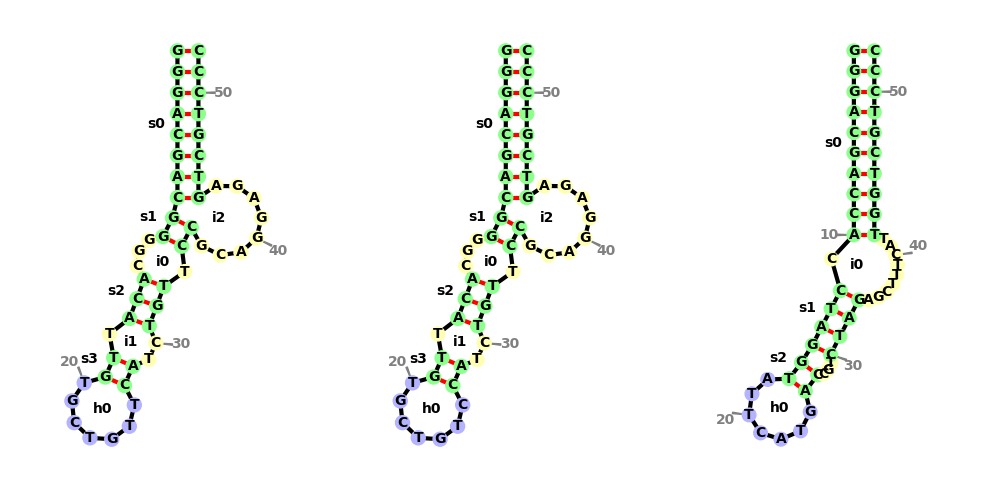

count 12126 Preprocessed_N48 after 9th.csv
count 6848 Preprocessed_N48 after 9th.csv
count 3495 Preprocessed_N48 after 9th.csv


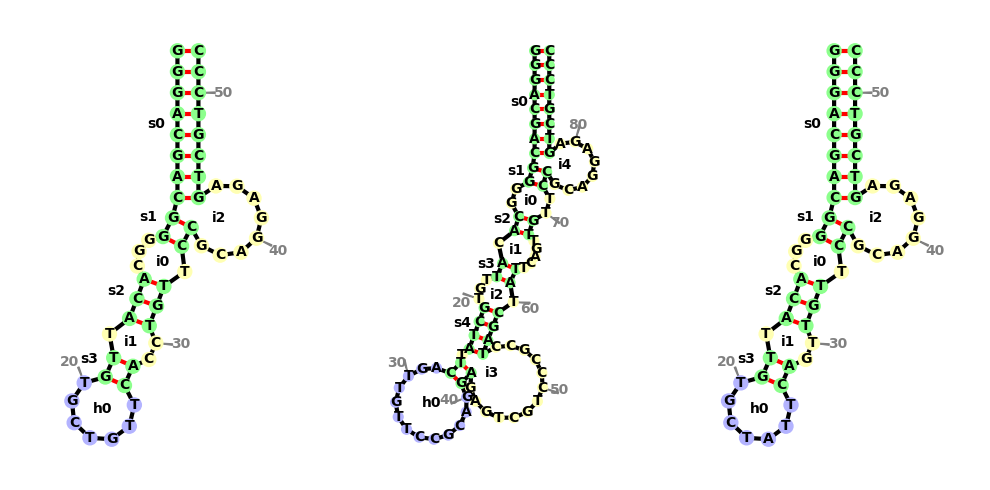

count 1318 Preprocessed_N48 after 9th.csv
count 1114 Preprocessed_N48 after 9th.csv
count 843 Preprocessed_N48 after 9th.csv


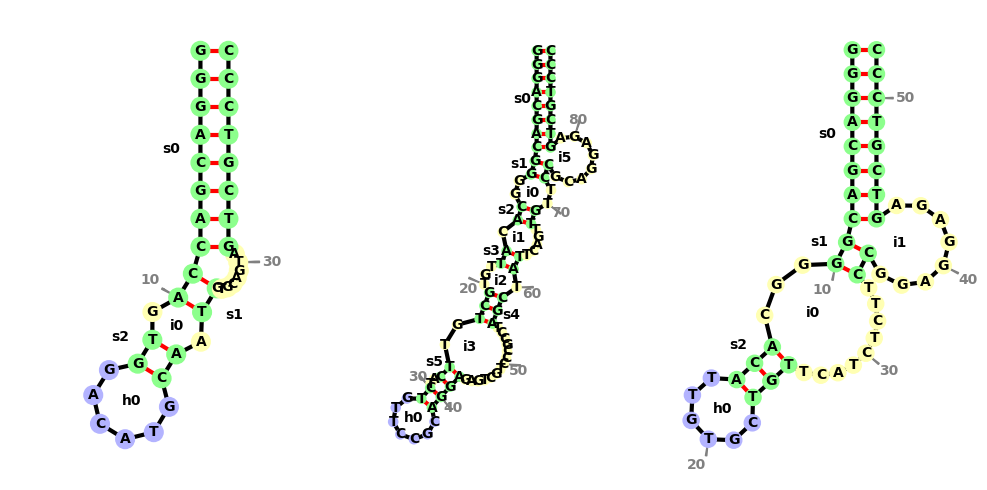

count 696 Preprocessed_N48 after 9th.csv
count 482 Preprocessed_N48 after 9th.csv
count 446 Preprocessed_N48 after 9th.csv


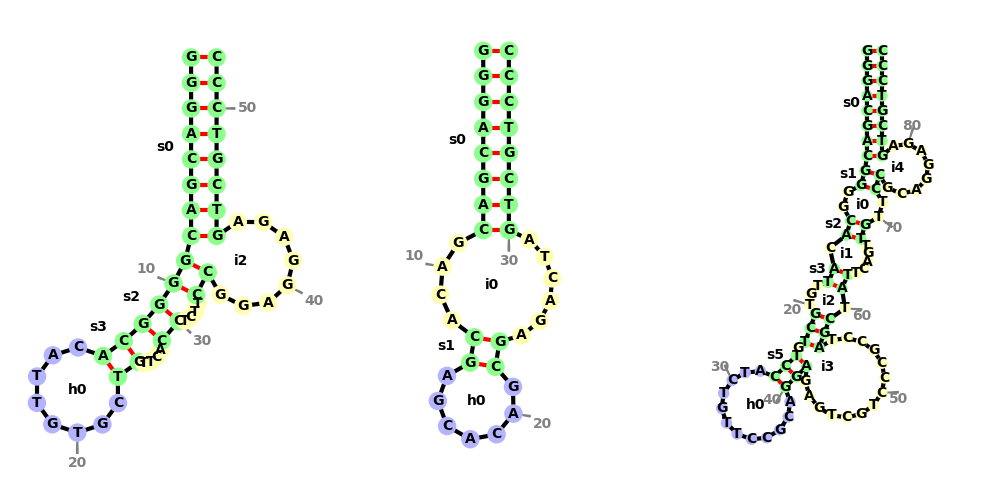

count 351 Preprocessed_N48 after 9th.csv
count 321 Preprocessed_N58 after 12th.csv
count 266 Preprocessed_N48 after 9th.csv


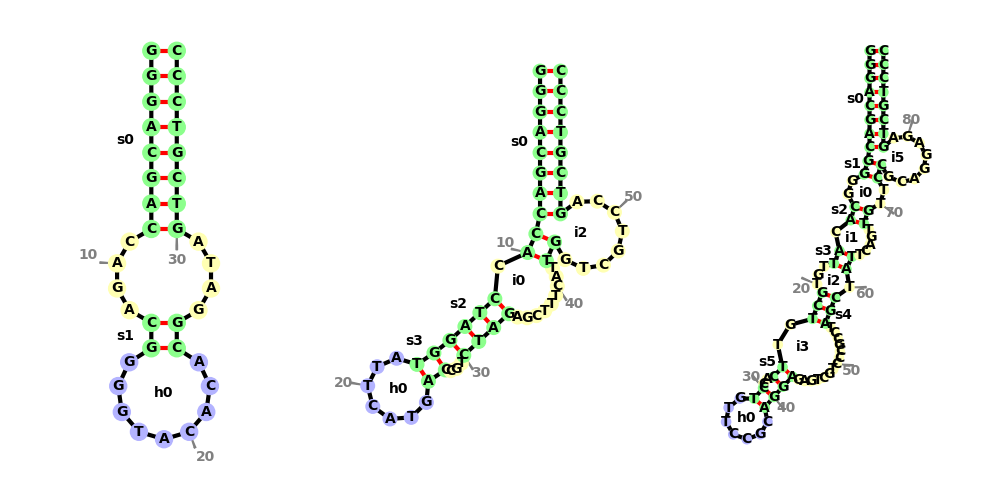

count 266 Preprocessed_N58 after 12th.csv
count 231 Preprocessed_N58 after 16th.csv
count 200 Preprocessed_N48 after 9th.csv


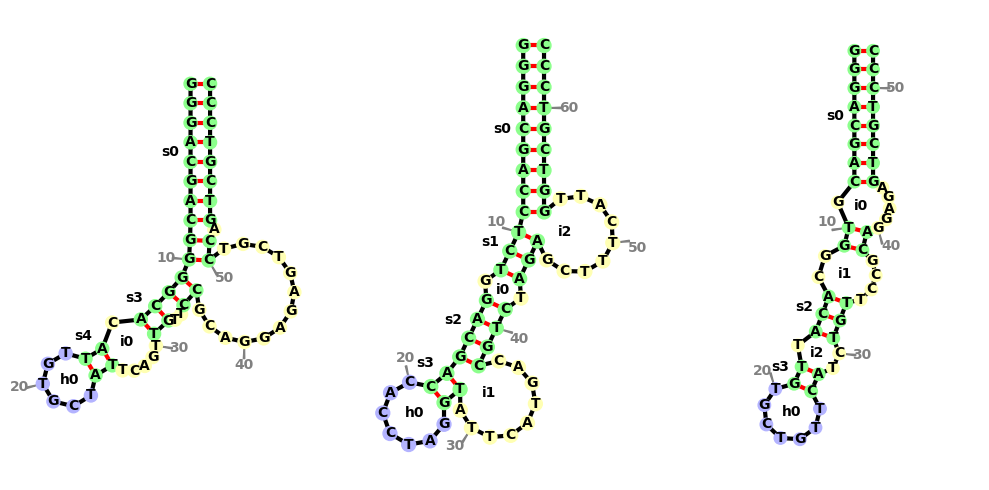

In [16]:

# Set the number of plots per row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = (len(df_top_k) + plots_per_row - 1) // plots_per_row

# Iterate over each row
for row in range(num_rows):
    # Create a new figure for the row
    plt.figure(figsize=(10, 5))
    
    # Iterate over plots in the row
    for j in range(plots_per_row):
        # Calculate the index in the DataFrame
        index = row * plots_per_row + j
        
        # Check if the index is within the DataFrame length
        if index < len(df_top_k):
            # Print the count
            print('count', df_top_k['Count'][index], df_top_k['File'][index])
            
            # Create a subplot for each plot
            plt.subplot(1, plots_per_row, j + 1)
            
            # Create a BulgeGraph from dot-bracket notation and sequence
            bg = BulgeGraph.from_dotbracket(df_top_k['Structure_graph_match'][index], df_top_k['Sequence'][index])
            
            # Plot the RNA structure
            fvm.plot_rna(bg, text_kwargs={"fontweight": "black"}, lighten=0.7, backbone_kwargs={"linewidth": 3})
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [15]:
def check_substring( string, substring,):
    if substring in string:
        return True
    else:
        return False
    
def check_substring2( string):
    if '((((((((((...(' in string and ').))........))))))))' in string :
        return True
    else:
        return False
    
substring = ')........))))))))'

In [8]:

df_match = df_no_duplicates[df_no_duplicates['Structure_graph_match'].apply(lambda x: check_substring(x, substring))]
print( 'number of aptamers in pool with selected subgraph:', len(df_match))

number of aptamers in pool with selected subgraph: 1033


In [7]:

df_match = df_no_duplicates[df_no_duplicates['Structure_graph_match'].apply(lambda x: check_substring2(x))]
print( 'number of aptamers in pool with both selected subgraph:', len(df_match))

number of aptamers in pool with both selected subgraph: 231
